# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

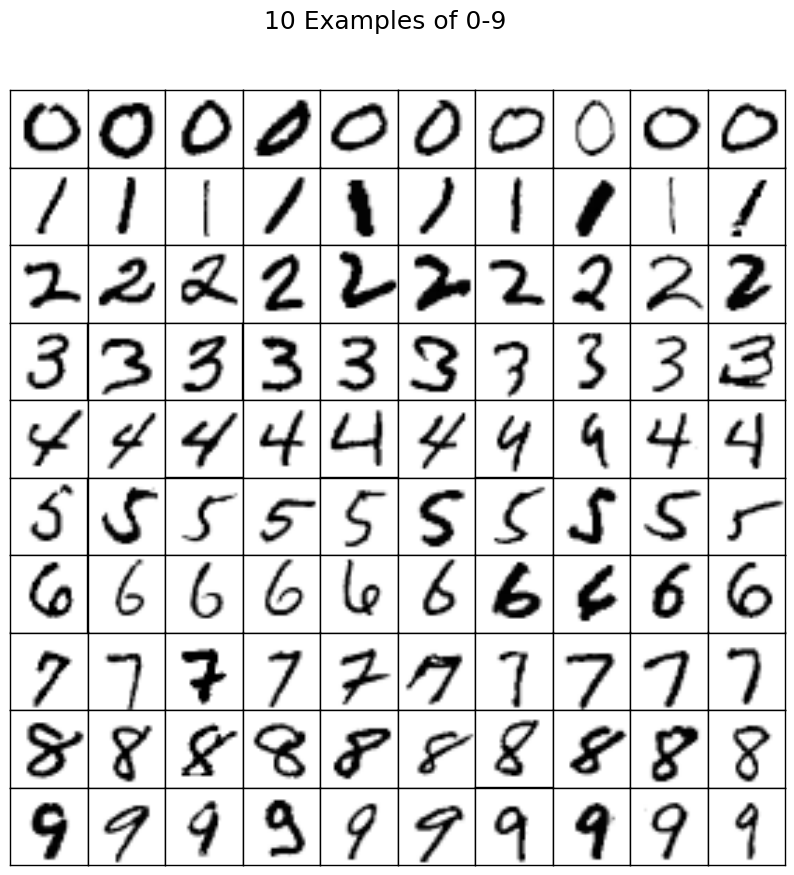

In [3]:
def P1(num_examples=10):

### STUDENT START ###

    ## Configuring image 
    plt.rc('image', cmap = 'Greys')
    figure = plt.figure(figsize = (num_examples, len(np.unique(Y))))
    figure.suptitle('10 Examples of 0-9', fontsize = 18)

    ## Create an array with 10 examples of specified digit 
    for i in np.nditer(np.unique(Y)):
        dlist = X[Y == i][:num_examples]
        
        ## For each of the 10 examples, create and plot number of digits x 10 (or user-def num_examples) of each digit
        for j in range(num_examples):
            plt.subplot(len(np.unique(Y)), num_examples, i * num_examples + j + 1)
            plt.subplots_adjust(wspace=0, hspace=0)
            
            ## Clean up plots - hide tickmarks, scale, frame
            cl = plt.gca()
            cl.axes.get_xaxis().set_visible(False)
            cl.axes.get_yaxis().set_visible(False)
            
            ## Plot digit and reshape to square
            dm = int(np.sqrt(X.shape[1]))
            dplot = dlist[j].reshape((dm, dm))
            figure = plt.imshow(dplot)

            

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [17]:
def P2(k_values):

### STUDENT START ###
    
    accuracy = []
    ## The funciton will loop through every k value
    for k in k_values:
        ## creating knn variable, and fitting a model using the mini-training set 
        kNN = KNeighborsClassifier(k)
        kNNMod = kNN.fit(mini_train_data, mini_train_labels)
        ## predicting labels using dev set, also create accuracy score
        kNNpred = kNN.predict(dev_data)
        acc_score = kNN.score(dev_data, dev_labels)
        
        ## Generate precision, recall, and F1 for each label for k=1 
        if k == 1:
            print ("Classification Report for k = {}".format(k))
            print (classification_report(dev_labels, kNNpred))
        
        ## Generate accuracy on dev set for input k values 
        print ("Accuracy for k = {} is {:.2f}%.".format(k, acc_score*100))
        accuracy.append(acc_score)        
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification Report for k = 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy for k = 1 is 88.80%.
Accuracy for k = 3 is 87.80%.
Accuracy for k = 5 is 86.90%.
Accuracy for k = 7 is 86.50%.
Accuracy for k = 9 is 86.30%.


**
ANSWER:
for k=1, 9 has the lowest precision score at 0.75, however its recall is higher than both 5 and 8. The lowest recall score is 5, with 0.76, but precision for 5 is at 0.83, which is higher than 9. 
We must consider both precision and recall in order to find the most difficult digit, F1-score considers both, so the most difficult digit is 9, with the lowest F1-score of 0.78. 
**

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [18]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    time_taken = []
    ## The function will loop through every training size [i]
    for i in train_sizes:
        ## Build the model using method from previous cell
        kNN = KNeighborsClassifier(1)
        ## Capture start time 
        start_time = time.time()
        ## Fit and predict 
        kNN.fit(train_data[0:i], train_labels[0:i])
        kNNpred = kNN.predict(dev_data)
        ## Capture end time and populate time taken 
        end_time = time.time()
        comp_time = round(end_time-start_time, 3)
        time_taken.append(comp_time)
        ## Derive accuracy score 
        acc = kNN.score(dev_data, dev_labels)
        accuracies.append(acc)
        
    ## Print Results 
    print(''.join('For training size {0:5d}, accuracy is {1:3f}, and computing time {2:4.2f}\n'.format(x,y,z)
                 for x,y,z in
                 zip(train_sizes, accuracies, time_taken)))
    
    
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

For training size   100, accuracy is 0.720000, and computing time 0.17
For training size   200, accuracy is 0.786000, and computing time 0.38
For training size   400, accuracy is 0.841000, and computing time 0.71
For training size   800, accuracy is 0.884000, and computing time 1.45
For training size  1600, accuracy is 0.902000, and computing time 2.95
For training size  3200, accuracy is 0.926000, and computing time 5.94
For training size  6400, accuracy is 0.937000, and computing time 12.30
For training size 12800, accuracy is 0.959000, and computing time 25.23
For training size 25000, accuracy is 0.970000, and computing time 50.13



(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Linear Regression, accuracy=[[ 1.24307226]]
Log Transformation on X, accuracy=[[ 1.03386514]]


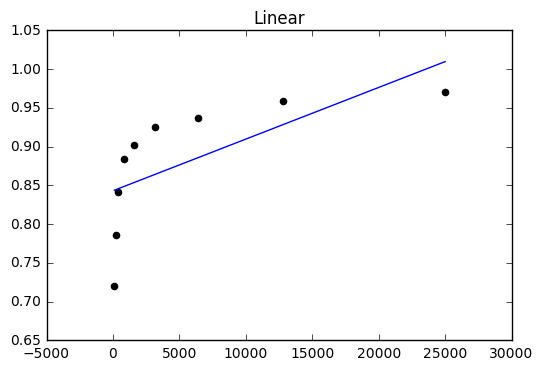

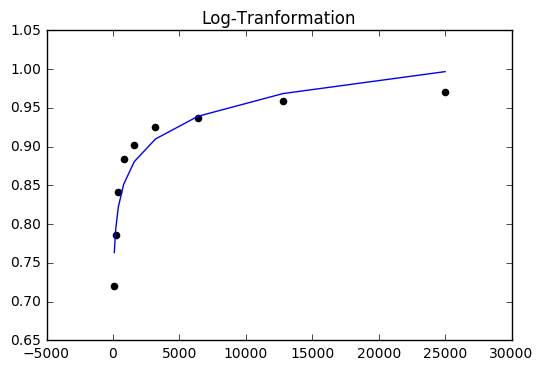

In [19]:
def P4():

    ### STUDENT START ###
    ## Convert input into array and fit the linear regression
    X = np.reshape(train_sizes, (len(train_sizes),1))
    Y = np.reshape(accuracies, (len(accuracies),1))
    lm = LinearRegression()
    lm.fit(X, Y)
    lmpred = lm.predict([[60000]])
    print("Linear Regression, accuracy={}".format(lmpred))
    
    ## Plot linear regression 
    plt.figure(1)
    plt.scatter(train_sizes, accuracies, color = 'black')
    plt.plot(train_sizes, lm.predict(X), color = 'blue')
    plt.title("Linear")
    
    ## Log tranformation on X
    xlog = np.log10(X)
    lmlog = lm.fit(xlog, Y)
    lmlogpred = lmlog.predict(np.log10([[60000]]))
    print("Log Transformation on X, accuracy={}".format(lmlogpred))
    
    ## Plot log transformation on x
    plt.figure(2)
    plt.scatter(train_sizes, accuracies, color = 'black')
    plt.plot(train_sizes, lmlog.predict(xlog), color = 'blue')
    plt.title('Log-Tranformation')   

### STUDENT END ###

P4()

**
ANSWER:
The predicted accuracy for n=60000 is 1.23, which does not make sense because accuracy cannot exceed 1. We can also see from the scatter plot that the relationship between train size and accuracy is clearly not a linear relationship. 
After applying a log transformation on train size, the fit is a little better, although accuracy is still slightly above 1 at 1.03. 
**

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [74]:
def P5():

### STUDENT START ###
    ## Create a model with k=1, fit model with mini training set, and predict confusion matrix with dev set 
    kNN = KNeighborsClassifier(1)
    kNN.fit(mini_train_data, mini_train_labels)
    conmat = confusion_matrix(dev_labels, kNN.predict(dev_data))
    all_pred = kNN.predict(dev_data)
    print(conmat) 
    
    
    ## The diagonal of the matrix represent successful pairs. So we must put 0s in the diagonal to hide these pairs 
    np.fill_diagonal(conmat,0)
    confused_pair = np.unravel_index(np.argmax(conmat), (10,10))
    print("The most confused pair of digits is {}".format(confused_pair))
        
    
### STUDENT END ###

P5()

[[ 88   0   1   0   0   1   1   0   0   0]
 [  0 131   1   1   0   0   0   0   0   0]
 [  1   2 101   2   0   1   0   2   2   0]
 [  1   1   1  88   0   3   1   0   2   1]
 [  0   1   0   0  93   0   0   1   0  12]
 [  2   2   1   7   0  59   1   0   1   5]
 [  2   2   0   0   1   1  94   0   1   0]
 [  1   2   0   0   1   0   0  90   0   4]
 [  0   4   1   3   2   5   3   0  77   2]
 [  0   1   1   2   4   1   0   6   0  71]]
The most confused pair of digits is (4, 9)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [22]:
def P6():
    
### STUDENT START ###
    def blurring(img, sigma):
        dm = int(np.sqrt(len(img)))
        
        ## Copy of image that will be blurred
        blur_img = np.copy(img)
        
        ## Define the array of possible coordinates
        coord = np.zeros((dm, dm, 2))
        for i in range(coord.shape[0]):
            for j in range(coord.shape[1]):
                coord[i,j,0] = i
                coord[i,j,1] = j
        
        ## Finding the original pixel, and its 8 neighboring values 
        neighborVal = KNeighborsClassifier(n_neighbors = 9)
        neighborVal.fit(np.concatenate(coord), np.zeros(dm*dm))
        
        ## Looping through every pixel in image
        for row in range(dm):
            for col in range(dm):
                neighbors = neighborVal.kneighbors([[row, col]])
                weights = np.exp(-(np.square(neighbors[0])) / (2*np.square(sigma)))/(2*np.pi*np.square(sigma))
                
                weights = weights / weights.sum()
        
        ## The blurred image will be a weighted combo of the original pixel, and its 8 surrounding neighbors 
                blur_img[row*dm+col] = np.average(img[neighbors[1]], weights = weights.tolist())
            return blur_img
     
    ## Create 1NN model
    kNN = KNeighborsClassifier(n_neighbors = 1)
    
    ## Blur both mini train data and dev data sets with sigma of 1
    blur_train = np.apply_along_axis(blurring, 1, mini_train_data, 1)
    blur_dev = np.apply_along_axis(blurring, 1, dev_data, 1)
    print(blur_train)
    print(blur_dev)
    
    ## Scenario 1 - Both datasets unpreprocessed 
#    kNN.fit(mini_train_data, mini_train_labels)
#    print("Dev Data: Unpreprocessed; Train Data: Unpreprocessed; Accuracy: {0:5.3f}".format(kNN.score(dev_data, dev_labels)))
    
    ## Scenario 2 - Dev Data preprocessed and train data unpreprocessed 
#    kNN.fit(mini_train_data, mini_train_labels)
#    print("Dev Data: Preprocessed; Train Data: Unpreprocessed; Accuracy: {0:.3f}".format(kNN.score(blur_dev, dev_labels)))

    ## Scenario 3 - Dev Data unpreprocessed and train data preprocessed 
#    kNN.fit(blur_train, mini_train_labels)
#    print("Dev Data: Unpreprocessed; Train Data: Preprocessed; Accuracy: {0:.3f}".format(kNN.score(dev_data, dev_labels)))
    
    ## Scenario 4 - Both datasets preprocessed 
#    kNN.fit(blur_train, mini_train_labels)
#    print("Dev Data: Preprocessed; Train Data: Preprocessed; Accuracy: {0:.3f}".format(kNN.score(blur_dev, dev_labels)))
    
    ### STUDENT END ###
    
P6()

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


**
ANSWER:
**

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [14]:
def P7():
    
### STUDENT START ###

    ## Categorize pixels using BernoulliNB  
    BernNB = BernoulliNB(alpha = 1.0, binarize = 0.333)
    BernNB.fit(mini_train_data, mini_train_labels)
    print("BernoulliNB, binarize = 0.333, accuracy = {0:5.3f}".format(BernNB.score(dev_data, dev_labels)))
    
    ## Categorize pixels using MultinomialNB: 0=white, 1 = grey, and 2 = black 
    m_data = mini_train_data.copy()
    m_data[m_data < 0.33] = 0
    m_data[np.logical_and(m_data >= 0.33, m_data <= 0.67)] = 1
    m_data[m_data > 0.67] = 2
    
    ## Train mini data on classification coded above 
    MultiNB = MultinomialNB(alpha = 1.0)
    MultiNB.fit(m_data, mini_train_labels)
    print("MultinomialNM, given definitions of white < 0.33, grey between 0.33 and 0.67, \nand black > 0.67, accuracy = {0:5.3f}".format(MultiNB.score(dev_data, dev_labels)))
    
### STUDENT END ###

P7()

BernoulliNB, binarize = 0.333, accuracy = 0.818
MultinomialNM, given definitions of white < 0.33, grey between 0.33 and 0.67, 
and black > 0.67, accuracy = 0.796


**
ANSWER:
Using the multi-class version, I got an accuracy of 0.796; using Bernoulli, I got an accuracy of 0.818. The multi-class version does not improve the results. The Bernoulli has better results in this case because it reduces the ambiguity of grey. Since this set of data only really has two options in terms of pixel value - black/white, it's better to use Bernoulli rather than Multi-class. If we had data that was written in multiple colors, then the multi-class version would most likely perform better than Bernoulli.
**

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [36]:
def P8(alphas):

### STUDENT START ###
    ## Creating a Bernoulli Model (from above) and using GridSearchCV to search over values of alpha
    BernNB = BernoulliNB(binarize = 0.333)
    ## GridSearchCV : http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    GridSearch = GridSearchCV(estimator = BernNB, param_grid = alphas)
    GridSearch.fit(mini_train_data, mini_train_labels)
    for i in range (len(GridSearch.grid_scores_)):
        print(GridSearch.grid_scores_[i])
    
    ## Alpha = 0
    print("For alpha = 0, accuracy = {0:3f}".format(GridSearch.grid_scores_[0][1]))
    return GridSearch
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

C:\Users\ysun1\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\ysun1\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\ysun1\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\ysun1\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\ysun1\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\ysun1\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.lo

mean: 0.10800, std: 0.00093, params: {'alpha': 0.0}
mean: 0.85800, std: 0.02084, params: {'alpha': 0.0001}
mean: 0.85800, std: 0.02345, params: {'alpha': 0.001}
mean: 0.85300, std: 0.02613, params: {'alpha': 0.01}
mean: 0.85200, std: 0.02266, params: {'alpha': 0.1}
mean: 0.84400, std: 0.02958, params: {'alpha': 0.5}
mean: 0.83900, std: 0.03007, params: {'alpha': 1.0}
mean: 0.83200, std: 0.03119, params: {'alpha': 2.0}
mean: 0.76600, std: 0.02938, params: {'alpha': 10.0}
For alpha = 0, accuracy = 0.108000


In [37]:
print(nb.best_params_)

{'alpha': 0.0001}


**
ANSWER:
The best value for alpha is 0.0001, with 0.001 and 0.01 also being fairly high in terms of accuracy. When alpha = 0, the accuracy drops to 0.108. This is expected because if we are setting alpha to be 0, then anything outside of the test data set would have probability = 0; which not only discards valuable information, but also makes this a very poor model for predicting data outside of the test dataset
**

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

Using GaussianNB on untransformed data results in an accuracy of 0.655
Using GaussianNB on transformed data results in an accuracy of 0.802


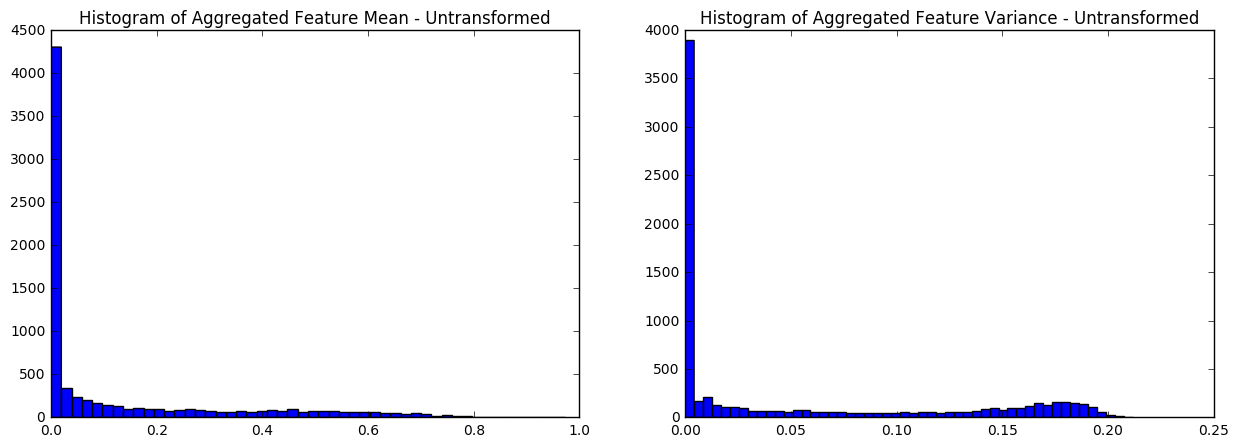

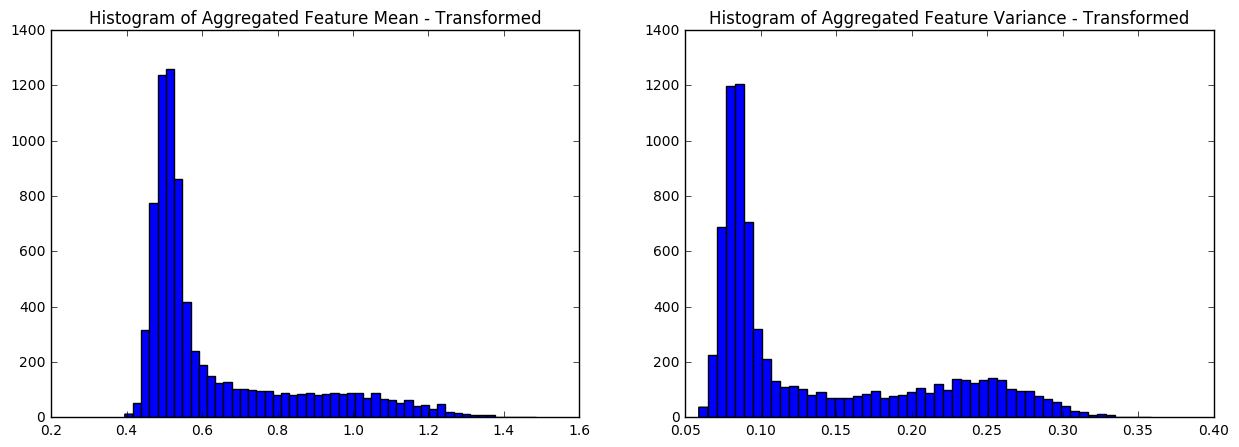

In [55]:
def P9():

### STUDENT END ###
    GausNB = GaussianNB()
    GausNB.fit(mini_train_data, mini_train_labels)
    print("Using GaussianNB on untransformed data results in an accuracy of {}".format(GausNB.score(dev_data, dev_labels)))
    
    ## Having an accuracy of 66.1% is quite low, we can examine each parameter to see if we can identify what's causing the low accuracy
    plt.figure(figsize = (15, 5))
    ## Aggregated Mean
    plt.subplot(1,2,1)
    plt.hist(GausNB.theta_.flatten(), 50)
    plt.title("Histogram of Aggregated Feature Mean - Untransformed")
    
    ## Aggregated Variance
    plt.subplot(1,2,2)
    plt.hist(GausNB.sigma_.flatten(), 50)
    plt.title("Histogram of Aggregated Feature Variance - Untransformed")
    
    ## We can add noise to the data to smooth out the heavy positive skew 
    t_mini_train_data = mini_train_data + np.random.uniform(size = mini_train_data.shape)
    t_dev_data = dev_data + np.random.uniform(size = dev_data.shape)
    t_GausNB = GaussianNB()
    t_GausNB.fit(t_mini_train_data, mini_train_labels)
    print("Using GaussianNB on transformed data results in an accuracy of {}".format(t_GausNB.score(t_dev_data, dev_labels)))
    
    plt.figure(figsize = (15, 5))
    ## Aggregated Mean
    plt.subplot(1,2,1)
    plt.hist(t_GausNB.theta_.flatten(), 50)
    plt.title("Histogram of Aggregated Feature Mean - Transformed")
    
    ## Aggregated Variance
    plt.subplot(1,2,2)
    plt.hist(t_GausNB.sigma_.flatten(), 50)
    plt.title("Histogram of Aggregated Feature Variance - Transformed")
    
### STUDENT END ###

gnb = P9()

**
ANSWER:
The accuracy of using GaussianNB on original training data results in an accuracy of 0.655, which is not that good. The parameters in the original training data is very skewed, mostly having 0s as shown on the top 2 histograms. If we added some uniformly distributed noise (from 0 to 1), we start to see some smoothing occur as shown on the bottom 2 histograms. The accuracy then improves to 0.802, which is closer to the BernoulliNB in previous exercises.  
**

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

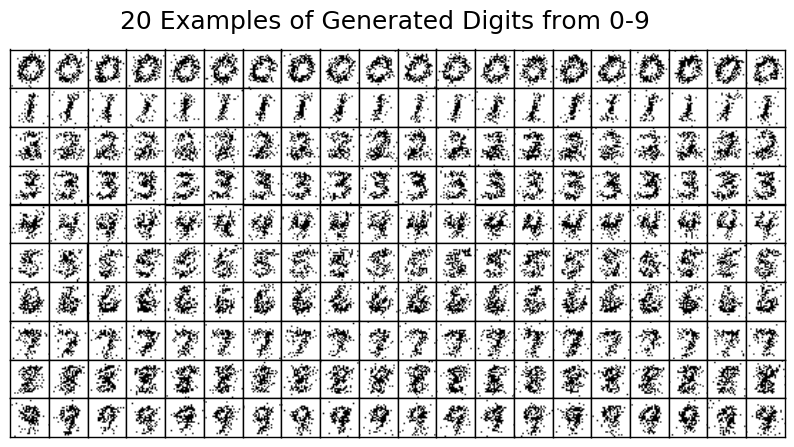

In [71]:
def P10(num_examples):

### STUDENT START ###
    ### Bernoulli model from previous parts 
    BernNB = BernoulliNB(binarize = 0.333)
    BernNB.fit(mini_train_data, mini_train_labels)
    
    ## Obtaining empirical log probability of features given a class, (Px_i|y)
    probs = np.exp(BernNB.feature_log_prob_)
    
    ## Configuring image
    plt.rc('image', cmap = 'Greys')
    figure = plt.figure(figsize = (10, 5), dpi = X.shape[1])
    figure.suptitle('20 Examples of Generated Digits from 0-9', fontsize = 18)
    
    ## For each of the 10 digits (0-9), and for each example in input num_examples, create a sub-plot 
    ## to plot each digit (i) num_example times (j)
    for i in range(len(np.unique(Y))):
        for j in range(num_examples):
            ex = np.where(probs[i,:]>np.random.rand(X.shape[1]), 1, 0)
            plt.subplot(len(np.unique(Y)), num_examples, i * num_examples + j + 1)
            plt.subplots_adjust(wspace=0, hspace=0)
        
            ## Clean up plots - hide tickmarks, scale, frame
            cl = plt.gca()
            cl.axes.get_xaxis().set_visible(False)
            cl.axes.get_yaxis().set_visible(False)
            
            ## Plot digits
            dm = int(np.sqrt(X.shape[1]))
            dplot = ex.reshape(dm, dm)
            plt.imshow(dplot)
### STUDENT END ###

P10(20)

**
ANSWER:
It looks like the generated digits are at least in the basic shape and form of the training digits. Some digits are more legible than others, such as 0s and 1s are more legible than 6s and 9s. 
**

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [79]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    ## Fit Bernoulli model
    BernNB = BernoulliNB(alpha = 0.0001, binarize = 0.5)
    BernNB.fit(mini_train_data, mini_train_labels)
    
    ## Dev data probability and labels 
    pred_dev = BernNB.predict(dev_data)
    pred_dev_prob = BernNB.predict_proba(dev_data)
    
    ## Go through every dev data example
    for index, pred_label in enumerate(pred_dev):
        ## Find maximum posterior probability
        Max_Post_Prob = max(pred_dev_prob[index])
        ## Bucket them in to the correct bin
        correct_bin = sum(Max_Post_Prob > buckets)
        ## Given that prediction matches the original label, update "correct" and "total" counters
        correct[correct_bin] += 1 if pred_label == dev_labels[index] else 0
        total[correct_bin] += 1
        
    return (correct, total)
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print("p(pred) <= %.13f    total = %3d    accuracy = %.3f" %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   1    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  38    accuracy = 0.263
p(pred) <= 0.9990000000000    total =  77    accuracy = 0.519
p(pred) <= 0.9999900000000    total =  72    accuracy = 0.569
p(pred) <= 0.9999999000000    total =  81    accuracy = 0.667
p(pred) <= 0.9999999990000    total =  67    accuracy = 0.746
p(pred) <= 0.9999999999900    total =  58    accuracy = 0.879
p(pred) <= 0.9999999999999    total =  61    accuracy = 0.803
p(pred) <= 1.0000000000000    total = 545    accuracy = 0.965


**
ANSWER:
This Naive Bayes classifier is weakly calibrated because when the posterior probability is 0.9, the accuracy is only 0.263; similarly, when the posterior proability goes to 0.999, the accuracy is only 0.519. 
**

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()